In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0164-09.IAGE.nc')
plotvar = data.variables['IAGE'][0,:,:]
lont = data.variables['TLONG']
latt = data.variables['TLAT']

In [3]:
#        lont = lont[:340,600:1400]
#        latt = latt[:340,600:1400]

In [6]:
lont.shape

(340, 800)

In [3]:
lont = lont[340,800:1300]
latt = latt[340,800:1300]
plotvar = plotvar[:,340,800:1300]
#plotvar[plotvar == '--'] = np.nan

In [4]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0162-09.z_t.nc')
A = data1.variables['z_t'][:]/100

In [5]:
B= np.arange(-300,200)
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'15'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,70,100,130,170,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
#|nice_levels = [34.40,34.42,34.45,34.50,34.55,34.60,34.65,34.68,34.70]
nice_levels = [0.1,0.3,0.5,1,10,50,80,120]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************
#********************************************************************
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


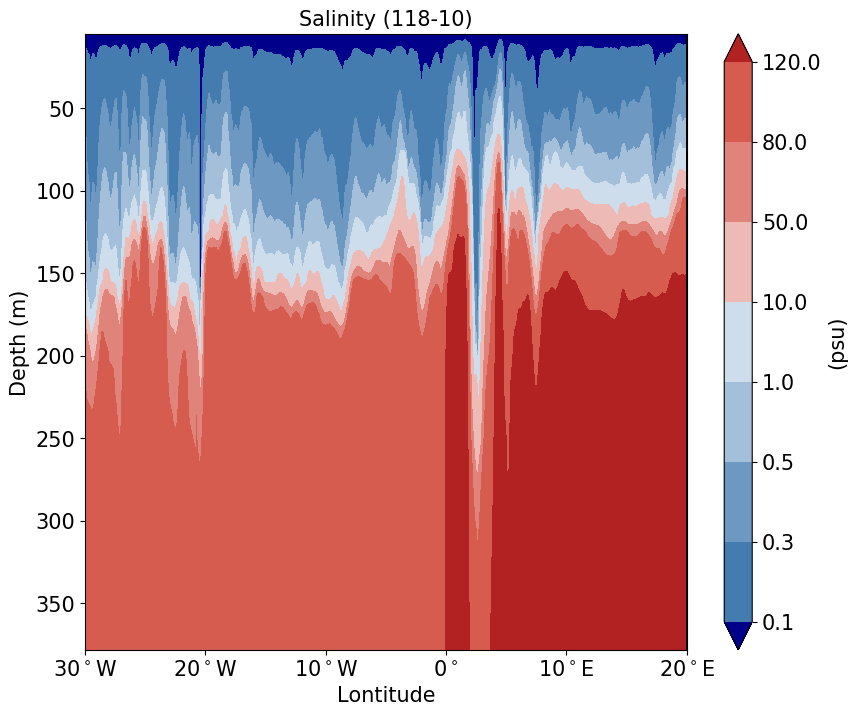

In [6]:
# plot the result
fig = plt.figure(figsize=(9.4, 7.7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:30,:], yy[:30,:], plotvar[:30,:],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("black")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:49,:], yy[:49,:], PD[:49,:],[27.74,27.75,27.76,27.77,27.78,27.785,27.786,27.787,27.788],colors = 'black', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, fontsize=10)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('(psu)', **my_font)
#############################################################################
##设定X坐标值
#plt.xticks(range(0,120,20), ['66.2$^\circ$S', '65.3$^\circ$S', '64.5$^\circ$S','63.6$^\circ$S','62.8$^\circ$S'])
#plt.yticks(range(0,61,5), ['5', '55','105', '155', '210', '285','408','638','1106','1968','3133','4375','5625'])
plt.yticks(**my_font)
plt.xticks(range(-300,300,100), ['30$^\circ$W', '20$^\circ$W', '10$^\circ$W', '0$^\circ$', '10$^\circ$E','20$^\circ$E','12$^\circ$E','14$^\circ$E'],**my_font)
plt.xlabel('Lontitude', **my_font)
plt.ylabel('Depth (m)', **my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (118-10)',**my_font)
plt.savefig("agecross118-10.png")

In [9]:
A[29]

378.22763